In [28]:
from numpy import exp, sqrt, pi, zeros
from math import log

def delta(T_a):
    return 4.3 + 0.145*T_a + 0.00196*T_a**2   # mean wind speed

def u_bar(T_a, t_h):
    return 11.2 + 0.365*T_a + 0.00706*T_a**2 + 0.9*log(t_h)

def integrand(u, T_a, t_h):   # integrand for probability of blowing snow
    out = zeros((len(T_a), len(u)))
    for i in range(len(T_a)):
        out[i, :] = exp(-(u_bar(T_a[i], t_h) - u)**2/(2*delta(T_a[i])**2))/(sqrt(2*pi*delta(T_a[i])))
    return out

In [29]:
from numpy import dot
from gaussxw import gaussxwab

def P(u_10, T_a, t_h):
    N = 100
    u, w = gaussxwab(N, 0., u_10)
    f = integrand(u, T_a, t_h)
    return dot(f, w)

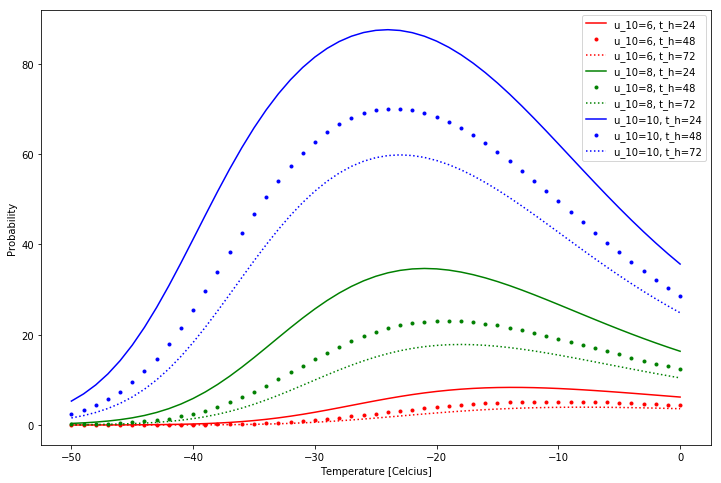

In [32]:
from pylab import figure, plot, title, xlabel, ylabel, legend, show
from numpy import arange

T_a = arange(-50, 1, 1)    # temperatures for which it may snow
figure(1, figsize=[12,8])
leg = []
for (u_10, color) in zip((6, 8, 10), ('r', 'g', 'b')):
    for (t_h, line) in zip((24, 48, 72), ('-', '.', ':')):
        plot(T_a, P(u_10, T_a, t_h)*100,line+color)
        leg.append('u_10={}, t_h={}'.format(u_10, t_h))
legend(leg)
xlabel('Temperature [Celcius]')
ylabel('Probability')
show()